In [1]:
# Let's import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



In [2]:
#and read the data
df_cal = pd.read_csv('./calendar.csv')
df_list = pd.read_csv('./listings.csv')
df_rev = pd.read_csv('./reviews.csv')


In [3]:
print(df_list.shape)
print(df_cal.shape)
print(df_rev.shape)


(3818, 92)
(1393570, 4)
(84849, 6)


In [4]:
#First look at the table with all listings available
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
#And this is the table with the calendar for 2016-this shows what dates in the calendar year each listing has been booked for
print(df_cal.head())
print(df_cal.info())

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB
None


In [6]:
#Finally this is the table with the reviews for each listing for the period 2009-2015
print(df_rev.head())
print(df_rev.info())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  

In [7]:
#Let's start exploring the relationship between month of the year and demand based on number of reviews from 2009 to 2015
#First we turn date to month
df_rev['month_name']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.month_name()

In [8]:
#We also change date to month as a number 1,2,..,12 (will help with sorting)
df_rev['month']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.month

In [9]:
#Columns added at the end
df_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,month_name,month
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,July,7
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,July,7
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",July,7
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,August,8
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,August,8


In [10]:
#Number of reviews per month (e.g. how many reviews we had in all Januaries together from 2009 to 2015. Same for other months)
df_rev_by_month=df_rev.groupby(['month_name','month']).id.nunique().reset_index().sort_values(['month'])

In [11]:
#Here it is
df_rev_by_month

,month_name,month,id
4,January,1,2867
3,February,2,2643
7,March,3,4158
0,April,4,4233
8,May,5,5854
6,June,6,8544
5,July,7,10503
1,August,8,13018
11,September,9,11677
10,October,10,8955


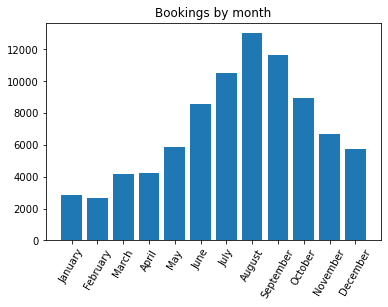

In [12]:
# More than obvious from the table above that Seattle is a summer destination.
# However and informative graph is always better than mere numbers. Let's give it a try then
plt.bar(df_rev_by_month.month_name,df_rev_by_month.id);
plt.title('Bookings by month');
plt.xticks(rotation=60);

In [13]:
# Look like Normal distribution peaked around August, slightly negatively skewed towards fall rather than winter.
# Does this reflect on the prices of the listings at all? The calendar dataset has the prices for 2016 for the dates
# in which each listing is available. Let's see what it tells us.

In [14]:
# As mentioned above there is no price available for any dates when the listing is booked (or unavailable by the 
# owner anyway). Let's drop any missing prices. The rest of the data is more than enough for inferences to be made
df_cal_prices=df_cal.dropna(subset='price',axis=0)

In [15]:
# Same as above. Let's create month name and month number 1-12 (will help with sorting)
df_cal_prices['month_name']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month_name()
df_cal_prices['month']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_12408\3116217305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['month_name']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month_name()
C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_12408\3116217305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['month']=pd.to_datetime(df_cal_prices['date'],format='%Y-%m-%d').dt.month


In [16]:
# Some more data preparation is also needed as price comes in currency format (string has been used in the dataset)
# We need to change it to numeric
df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_12408\3365103272.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')
C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_12408\3365103272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_prices['price_num']=df_cal_prices['price'].str.replace('$','').str.replace(',','').astype('float')


In [17]:
# As earlier let's group price by month (in this case it is for 2016 only). Average price will be calculated
df_cal_prices_monthly=df_cal_prices.groupby(['month_name','month']).mean()['price_num'].reset_index().sort_values(['month'])


In [18]:
# Any findings then?
df_cal_prices_monthly

,month_name,month,price_num
4,January,1,122.912176
3,February,2,124.293927
7,March,3,128.644488
0,April,4,135.097005
8,May,5,139.538183
6,June,6,147.473137
5,July,7,152.094150
1,August,8,150.656594
11,September,9,143.255949
10,October,10,137.031939


In [19]:
# Similar inference with previous table - summer being a bit more pricey. 


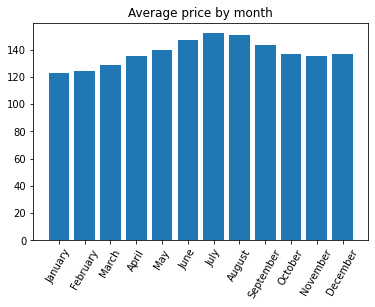

In [20]:
# But the graph tells more of the truth not caught by eye in the table
plt.bar(df_cal_prices_monthly.month_name,df_cal_prices_monthly.price_num);
plt.title('Average price by month');
plt.xticks(rotation=60);

In [21]:
# Yet another slightly negatively (towards fall) skewed Normal distribution.
# So prices tend to follow demand. But does it happen quite proportionately? See calculation below:

In [22]:
print('Total bookings in August of previous years: ',list(df_rev_by_month[df_rev_by_month.month_name=='August']['id'])[0]),
print('Total bookings in January of previous years: ',list(df_rev_by_month[df_rev_by_month.month_name=='January']['id'])[0])
print("That's an increase of ",round((list(df_rev_by_month[df_rev_by_month.month_name=='August']['id'])[0]/
list(df_rev_by_month[df_rev_by_month.month_name=='January']['id'])[0]-1)*100,1),'%')


Total bookings in August of previous years:  13018
Total bookings in January of previous years:  2867
That's an increase of  354.1 %


In [23]:
print('Average price in August for current year: $',round(list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='August']['price_num'])[0],2)),
print('Average price in January for current year: $',round(list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='January']['price_num'])[0],2)),
print("That's an increase of ",round((list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='August']['price_num'])[0]/
list(df_cal_prices_monthly[df_cal_prices_monthly.month_name=='January']['price_num'])[0]-1)*100,1),'%')


Average price in August for current year: $ 150.66
Average price in January for current year: $ 122.91
That's an increase of  22.6 %


In [24]:
## It seems not all owners price their properties in the summer as high as they could

In [25]:
## Let's now examine if new listings avalable each year lead to higher demand (or it could possibly be vice versa)

In [26]:
## We are going to need year instead of month for this query
## Calendar dataset (aw well as listings one) only has the listings available for 2016 so not very helpful
## for chronological data. Reviews dataset will lead us again
df_rev['year']=pd.to_datetime(df_rev['date'],format='%Y-%m-%d').dt.year


In [27]:
# Excluding these first 3 days of the year and any reviews been made so far, let's calculate number of listings
# been reviewed over the years
df_rev[df_rev.year!=2016].groupby(['year']).listing_id.nunique()

year
2009       4
2010      35
2011      96
2012     232
2013     508
2014    1203
2015    3091
Name: listing_id, dtype: int64

In [28]:
# So what about number of reviews (id) and number of unique reviewers (reviewer_id)
df_rev_summary_year=df_rev[df_rev.year!=2016].groupby(['year'])['listing_id','id','reviewer_id'].nunique().reset_index()

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_12408\11588390.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rev_summary_year=df_rev[df_rev.year!=2016].groupby(['year'])['listing_id','id','reviewer_id'].nunique().reset_index()


In [29]:
df_rev_summary_year

,year,listing_id,id,reviewer_id
0,2009,4,17,16
1,2010,35,254,238
2,2011,96,1169,1107
3,2012,232,3251,3051
4,2013,508,7077,6644
5,2014,1203,20365,18928
6,2015,3091,52493,48089


In [30]:
#As expected an upward trend in all 3 metrics but the variation in the numbers make it hard for inference.
# Let's put another bar chart then (grouped this time)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [31]:
years = np.arange(len(df_rev_summary_year['year']))
listings=df_rev_summary_year['listing_id']
reviews=df_rev_summary_year['id']
reviewers=df_rev_summary_year['reviewer_id']
width=0.2

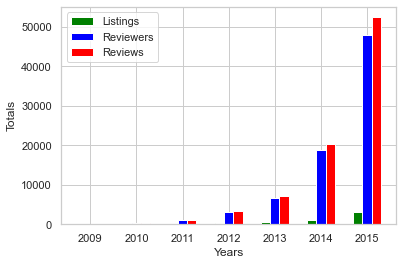

In [32]:
plt.bar(years-width, listings, width, color='green')
plt.bar(years, reviewers, width, color='blue')
plt.bar(years+width, reviews, width, color='red')

plt.xticks(years, list(df_rev_summary_year['year']))
plt.xlabel("Years")
plt.ylabel("Totals")
plt.legend(["Listings","Reviewers", "Reviews" ])

plt.show()

In [33]:
#First 3-4 years really tiny compared to subsequent ones. Absolute numbers don't tell much of the truth here...
# Shall we look into percentage increase instead?

In [34]:
df_rev_pct_change_temp=df_rev_summary_year.set_index('year').pct_change()*100

In [35]:
df_rev_pct_change_temp_rounded=round(df_rev_pct_change_temp,0)

In [36]:
df_rev_pct_change_temp_rounded

,listing_id,id,reviewer_id
year,,,
2009,NaN,NaN,NaN
2010,775.0,1394.0,1388.0
2011,174.0,360.0,365.0
2012,142.0,178.0,176.0
2013,119.0,118.0,118.0
2014,137.0,188.0,185.0
2015,157.0,158.0,154.0


In [37]:
# First year obviously needs to be discardes
df_rev_pct_change=df_rev_pct_change_temp_rounded.reset_index()[1:]

In [38]:
df_rev_pct_change

,year,listing_id,id,reviewer_id
1,2010,775.0,1394.0,1388.0
2,2011,174.0,360.0,365.0
3,2012,142.0,178.0,176.0
4,2013,119.0,118.0,118.0
5,2014,137.0,188.0,185.0
6,2015,157.0,158.0,154.0


In [39]:
# And then seek for more help from another graph

In [40]:
years_2 = np.arange(len(df_rev_pct_change['year']))
listings_2=df_rev_pct_change['listing_id']
reviews_2=df_rev_pct_change['id']
reviewers_2=df_rev_pct_change['reviewer_id']
width=0.2

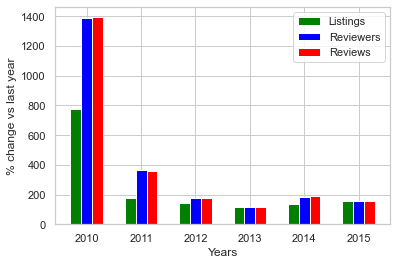

In [41]:
plt.bar(years_2-width, listings_2, width, color='green')
plt.bar(years_2, reviewers_2, width, color='blue')
plt.bar(years_2+width, reviews_2, width, color='red')

plt.xticks(years_2, list(df_rev_pct_change['year']))
plt.xlabel("Years")
plt.ylabel("% change vs last year")
plt.legend(["Listings","Reviewers", "Reviews" ])

plt.show()

In [42]:
# We can see that from 2012 onwards the percentage increase in listings and bookings (as shown by reviews)
# follow each other. 
# That wasn't particularly the case in the first two years though as the demand there was more rapidly increased than
# the supply, possibly due to the increasing popularity of Airbnb as a platform

In [43]:
# Finally, let's explore what affects the prices of the listings by using data from the listings table

In [44]:
# Create a copy where the price format will change to number (as in the calendar dataset above)
df_list_prices=df_list

In [45]:
df_list_prices['price_num']=df_list_prices['price'].str.replace('$','').str.replace(',','').astype('float')

C:\Users\KokkinopoulosG\AppData\Local\Temp\ipykernel_12408\1193763243.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_list_prices['price_num']=df_list_prices['price'].str.replace('$','').str.replace(',','').astype('float')


In [46]:
# Let's pick some of the variables which seem to be of particular effect on the price
# You might have noticed that price is the first of these variable. Obviously this is NOT and independent variable
# as the name of the list below states - it's the response one. I have just put it here so that I can calculate
# its correlation with the really independent ones (all others then)

independent_variables=['price_num','host_response_rate','host_acceptance_rate','host_is_superhost','neighbourhood_group_cleansed','property_type',
                       'room_type','accommodates','bathrooms','bedrooms','beds','bed_type','security_deposit',
                       'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','availability_30',
                       'availability_60','availability_90','availability_365','number_of_reviews',
                       'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                       'review_scores_communication','review_scores_location','review_scores_value','instant_bookable',
                       'cancellation_policy','require_guest_profile_picture','require_guest_phone_verification','reviews_per_month',
                       'is_location_exact'
                      ]

In [47]:
# Let's narrow down to the necessary variables (that's the main reason for using this copy table)
df_list_prices=df_list_prices[independent_variables]

In [48]:
# What if I try to drop missing data in the categorical variables 

df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']
                      ,axis=0).shape
               

(3815, 36)

In [49]:
# 3815 of the initial 3818 values remain - not a big loss so let's give it a go.

In [50]:
df_list_prices=df_list_prices.dropna(subset=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']
                      ,axis=0)
               

In [51]:
# Are thing equally good if I drop missing data in the numeric ones?
df_list_prices.dropna(subset=['host_acceptance_rate','bathrooms','bedrooms','beds','availability_30','availability_60','availability_90',
                              'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                              'reviews_per_month','host_response_rate','accommodates','security_deposit','cleaning_fee','guests_included',
                              'extra_people','minimum_nights','maximum_nights'],axis=0).shape

(1233, 36)

In [52]:
# Not as good news here. Only 1233 rows (around 30%) remain here.
# Dropping is not recommended then.
# Even imputting (by using mean perhaps) is risky, so let's see the big picture: 
# Are all these variables considerably correlated with price? Let's see below:

In [53]:
# Let's put all numeric explanatory (as well as the response) variables together
num_vars=['price_num','host_acceptance_rate','bathrooms','bedrooms','beds','availability_30','availability_60','availability_90',
                              'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                              'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                              'reviews_per_month','host_response_rate','accommodates','security_deposit','cleaning_fee','guests_included',
                              'extra_people','minimum_nights','maximum_nights']

In [54]:
# I am going to need to see all correlations available so let's change the settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [55]:
# This is the correlations table... or, to be honest, a subset of that looking at price's column only
df_list_prices[num_vars].corr()['price_num']

price_num                      1.000000
bathrooms                      0.516703
bedrooms                       0.628138
beds                           0.589924
availability_30               -0.037223
availability_60               -0.048817
availability_90               -0.058222
availability_365              -0.014980
number_of_reviews             -0.124598
review_scores_rating           0.055551
review_scores_accuracy         0.019026
review_scores_cleanliness      0.054357
review_scores_checkin          0.007877
review_scores_communication    0.012990
review_scores_location         0.075069
review_scores_value           -0.041776
reviews_per_month             -0.218588
accommodates                   0.652665
guests_included                0.393150
minimum_nights                 0.017329
maximum_nights                -0.003448
Name: price_num, dtype: float64

In [56]:
# Bathrooms, bedrooms and beds are quite strongly correlated to price (as expected) as well as accomodates (number of people)
# and guests included.  Number of reviews seem to be important too (though negatively) as well as monthly reviews.
# But these two sets of variables seem to be correlated to each other as they describe similar or related things.
# So let's look closer at the correlation of these variables only to each other

num_vars_new=['price_num','bedrooms','bathrooms','beds','reviews_per_month','number_of_reviews',
              'accommodates','guests_included']


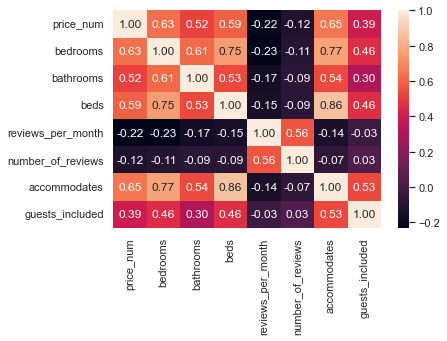

In [57]:
# A heatmap will make the difference here
sns.heatmap(df_list_prices[num_vars_new].corr(), annot=True, fmt=".2f");

In [58]:
# As expected bathrooms, bedrooms,beds, accomodates and guests included are quite strongly correlated 
# to each other
# Same with number of review and reviews per month
# Let's see missing values

In [59]:
df_list_prices[num_vars_new].isnull().sum()

price_num              0
bedrooms               6
bathrooms             16
beds                   1
reviews_per_month    624
number_of_reviews      0
accommodates           0
guests_included        0
dtype: int64

In [ ]:
# It seems that bedrooms is a good option (only 6 missing values and very high correlation)
# On the other hand reviews per month has bigger correlation with price (0.22 to 0.12) than number of reviews
# but it drops 624 rows (around 16%) so the latter will be selected


In [60]:
num_vars_2=['price_num','bedrooms','number_of_reviews']
num_vars_3=['bedrooms','number_of_reviews']

In [61]:
# Bring settings back to default
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [62]:
df_list_prices[num_vars_2].corr()

,price_num,bedrooms,number_of_reviews
price_num,1.000000,0.628138,-0.124598
bedrooms,0.628138,1.000000,-0.105771
number_of_reviews,-0.124598,-0.105771,1.000000


In [65]:
#Let's remove missing values
df_list_prices.dropna(subset='bedrooms',axis=0,inplace=True)

In [67]:
# Let's see what happens with the categorical variables 
cat_vars=['is_location_exact','neighbourhood_group_cleansed','property_type','room_type','bed_type',
                              'host_is_superhost','instant_bookable','cancellation_policy','require_guest_profile_picture',
                              'require_guest_phone_verification']

In [68]:
# We will create the dummy ones
for var in  cat_vars:
        
        df_list_prices = pd.concat([df_list_prices.drop(var, axis=1), pd.get_dummies(df_list_prices[var], prefix=var, prefix_sep='_')], axis=1)
    

In [69]:
# Finally let's drop the variables that have been discarded
df_list_prices.drop(['host_acceptance_rate','accommodates','bathrooms','beds','availability_30','availability_60','availability_90','availability_365',
                     'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                     'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','host_response_rate',
                      'security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',
                     'maximum_nights'],axis=1,inplace=True)

In [71]:
df_list_prices.shape

(3809, 57)

In [72]:
# Let's separate the independent variables from the response one
y=df_list_prices['price_num']
X=df_list_prices.drop(['price_num'],axis=1)

In [73]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

    

c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [74]:
# So let's test our work
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5508444680471313.  The rsquared on the test data was -1.239683540223447e+22.


In [75]:
# Training data is good but test data is almost 0. Too much overfitting
# Did we discard any categorical variables at all?
# What if there is correlation between them?
# Let's isolote the numeric ones first, then we will look into categorical ones

In [76]:
X2=df_list_prices[num_vars_3]


In [77]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)

lm_model2 = LinearRegression(normalize=True) # Instantiate
lm_model2.fit(X2_train, y2_train) #Fit

#Predict using your model
y2_test_preds = lm_model2.predict(X2_test)
y2_train_preds = lm_model2.predict(X2_train)

#Score using your model
test_score = r2_score(y2_test, y2_test_preds)
train_score = r2_score(y2_train, y2_train_preds)


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [78]:
# Test results again
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.3989135084603903.  The rsquared on the test data was 0.39554074990083854.


In [79]:
# Test set does equally good here
# Let's see the coefficients then

In [80]:
print(lm_model.fit(X2_train, y2_train).coef_)
print(lm_model.fit(X2_train, y2_train).intercept_)


[62.68345    -0.14729674]
48.96391374915629


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

In [81]:
#Let's investigate if there are any categorical variables that affect price more than others
cat_vars2=list(df_list_prices.select_dtypes(include='uint8').columns)

In [82]:
cat_vars2

['is_location_exact_f',
 'is_location_exact_t',
 'neighbourhood_group_cleansed_Ballard',
 'neighbourhood_group_cleansed_Beacon Hill',
 'neighbourhood_group_cleansed_Capitol Hill',
 'neighbourhood_group_cleansed_Cascade',
 'neighbourhood_group_cleansed_Central Area',
 'neighbourhood_group_cleansed_Delridge',
 'neighbourhood_group_cleansed_Downtown',
 'neighbourhood_group_cleansed_Interbay',
 'neighbourhood_group_cleansed_Lake City',
 'neighbourhood_group_cleansed_Magnolia',
 'neighbourhood_group_cleansed_Northgate',
 'neighbourhood_group_cleansed_Other neighborhoods',
 'neighbourhood_group_cleansed_Queen Anne',
 'neighbourhood_group_cleansed_Rainier Valley',
 'neighbourhood_group_cleansed_Seward Park',
 'neighbourhood_group_cleansed_University District',
 'neighbourhood_group_cleansed_West Seattle',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 

In [83]:
#Let's add price_num
cat_vars2=['price_num','is_location_exact_f', 'is_location_exact_t',
       'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boat',
       'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'host_is_superhost_f', 'host_is_superhost_t', 'instant_bookable_f',
       'instant_bookable_t', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'require_guest_profile_picture_f', 'require_guest_profile_picture_t',
       'require_guest_phone_verification_f',
       'require_guest_phone_verification_t']

In [84]:
pd.set_option('display.max_rows',None)

In [85]:
print(df_list_prices[cat_vars2].corr()['price_num'])
pd.set_option('display.max_rows',10)

price_num                                           1.000000
is_location_exact_f                                -0.016068
is_location_exact_t                                 0.016068
neighbourhood_group_cleansed_Ballard               -0.009247
neighbourhood_group_cleansed_Beacon Hill           -0.065948
neighbourhood_group_cleansed_Capitol Hill           0.012803
neighbourhood_group_cleansed_Cascade                0.020767
neighbourhood_group_cleansed_Central Area           0.001313
neighbourhood_group_cleansed_Delridge              -0.072035
neighbourhood_group_cleansed_Downtown               0.117111
neighbourhood_group_cleansed_Interbay              -0.010876
neighbourhood_group_cleansed_Lake City             -0.052314
neighbourhood_group_cleansed_Magnolia               0.070206
neighbourhood_group_cleansed_Northgate             -0.063949
neighbourhood_group_cleansed_Other neighborhoods   -0.045508
neighbourhood_group_cleansed_Queen Anne             0.093840
neighbourhood_group_clea

In [86]:
# It seems that variables related to room type and cancellation policy are the most important ones.
# So let's add them to the numerical ones

In [87]:
mixed_vars=['bedrooms','number_of_reviews','room_type_Entire home/apt','room_type_Private room','room_type_Shared room',
'cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_strict']

In [88]:
X3=df_list_prices[mixed_vars]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=42)

lm_model3 = LinearRegression(normalize=True) # Instantiate
lm_model3.fit(X3_train, y3_train) #Fit

#Predict using your model
y3_test_preds = lm_model3.predict(X3_test)
y3_train_preds = lm_model3.predict(X3_train)

#Score using your model
test_score = r2_score(y3_test, y3_test_preds)
train_score = r2_score(y3_train, y3_train_preds)


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [89]:
# Results
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))
print('Coefficients are: ',lm_model.fit(X3_train, y3_train).coef_)
print('Intercept is: ',lm_model.fit(X3_train, y3_train).intercept_)

The rsquared on the training data was 0.4894220447278539.  The rsquared on the test data was 0.4843623938828233.
Coefficients are:  [ 54.30813831  -0.13381161  29.00708272 -22.61063674 -55.05768324
  -2.84829265  -5.20850281   7.50734196]
Intercept is:  48.54190422211971


c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Miniconda\Miniconda3\envs\basic_env\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

In [90]:
#Substantially better than earlier:
# R squared is at 48% up from 39% and it's almost the same in both sets so this model fits perfectly to the test set
# An extra room would increase the price by $54 whereas Entire apartments are about $51 (difference between 29 and -22)
# more expensive than private rooms.
# Finally, a strict cancellation policy plays a positive role in the price compared to flexible and moderate ($10 up 
# compared to flexible)